# MVP - Pós-Doutorado
## Regina Delcourt

##Análise de Dados: Ocorrência de Alagamento
##Estação Coronel Veiga - Petrópolis / RJ

### Análise de Dados Para um Problema de Classificação

## Estrutura
O notebook está dividido da seguinte maneira:

1. Definição do Problema
  
  1.1. Importação dos pacotes

2. Carga de Dados
  
  2.1. Carregamento do dataset

  2.2. Visualização dos dados

  2.3. Consolidação das planilhas

  2.4. Renomeação dos atributos

3. Análise de Dados
  
  3.1. Estatísticas Descritivas
    
4. Pré-Processamento de Dados
  
  4.1. Visualização dos valores máximos

  4.2. Substituição de valores

  4.3. Tratamento de Missings e Limpeza

  4.4. Criação de novos atributos

  4.5. Resumo estatístico

  4.6. Visualizações Unimodais

  4.7. Visualização Multimodais

5. Preparação de Dados para ML

  5.1. Definição de atributos e classes

  5.2. Separação em conjunto de treino e conjunto de teste

  5.3. Modelagem e Inferência

  5.4. Finalização do Modelo e Avaliação Resultados

6. Simulando em Dados Não Vistos


####Créditos
O notebook foi elaborado e documentado por: Regina Delcourt

## 1. Definição do Problema

**Objetivo:** O objetivo do presente trabalho é realizar a análise e o pré-processamento de dados de uma base de dados, de forma a prepará-lo para, por meio de modelos de machine learning, ser possível prever se terá ocorrência de extravasamento (alagamento) do rio, com base em dados meteorológicos.

**Descrição do problema:** Analisar e pré-processar dados, para um modelo de aprendizagem de máquina de previsão da ocorrência de alagamentos, é crucial para permitir um planejamento mais eficiente e sustentável em diversas áreas da sociedade, como por exemplo, gestão de recursos hídricos, prevenção de desastres naturais, planejamento urbano e transporte, reduzindo riscos, melhorando a resiliência e otimizando o uso de recursos. Por isso a importância contínua do desenvolvimento e aprimoramento de tecnologias de previsão meteorológica.

**Premissas do problema:** O problema apresentado no presente trabalho é um problema de aprendizado supervisionado, onde o algoritmo será treinado em um conjunto de dados rotulado, sendo que cada exemplo de entrada está associado a uma ocorrência de saída (nível do nível do rio, associado à ocorrência de alagamento ou não).

**Condições / Sobre o Dataset:** O conjunto de dados utilizados no presente trabalho, contém aproximadamente 12 anos de observações meteorológicas diárias de Dados de chuva e nível por estação extraídas da estação telemétrica de monitoramento "Coronel Veiga", localizada no município de Petrópolis, região serrana do estado do Rio de Janeiro.

Os dados hidrometeorológicos foram obtidos no Google Drive através do link disponibilizado pelo Instituto Estadual do Ambiente (INEA) do Rio de Janeiro (https://drive.google.com/drive/folders/1jOfCAhb8llozzsAOE-KW9NJYC_ivcgNx?usp=share_link), planilha https://docs.google.com/spreadsheets/d/1yfFyZPhVj-5GSGDaupmRmauD_yvF7NBx/edit#gid=922321245.

A base de dados é composta por 5 atributos, sendo a maioria variáveis numéricas relacionadas à dados meteorológicos, sendo um deles, no presente trabalho, considerado o atributo de classe, que indica a ocorrência de alagamento ou não.

**Definição dos atributos:**

1. **DATA E HORA UTC** - Data da medição
2. **CHUVA (mm)** - Quantidade de chuva registrada na data e horário, em mm
3. **NIVEL (m)** - Nível d'água do rio, registrado na datae horário, em m
4. **CHUVA CORRIGIDA** - Quantidade de chuva registrada na data e horário, corrigida, em mm
5. **NIVEL CORRIGIDO** - Nível d'água do rio, registrado na datae horário, corrigido, em m

De acordo com as "Orientações para uso dos dados", fornecidas pelo INEA, os dados das estações telemétricas estão em horário local até 2020 e em horário internacional a partir de 2021, isto significa que para dados a partir de 2021 deve-se subtrair 3 horas (ou duas horas quando houver horário de verão) para chegar ao horário local. Assim como, o banco de dados telemétricos está passando por um processo de atualização e correção de dados, justificando os atributos "chuva corrigida" e "nível corrigido".





###1.1 - Importação dos pacotes utilizados neste notebook e configuração para que os warnings não sejam exibidos

In [5]:
# Importação de Pacotes
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from os import statvfs_result
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

###2.1 - Carregamento do dataset a partir de um arquivo disponível no computador local

Ressalta-se, aqui, que o arquivo foi baixado do link disponibilizado pelo INEA (https://docs.google.com/spreadsheets/d/1yfFyZPhVj-5GSGDaupmRmauD_yvF7NBx/edit#gid=922321245), e alguns tratamentos foram realizados no arquivo.

Foram eliminadas as colunas de dados que não são objetos do presente estudo, tais como: "origem chuva", "origem nível", "comentários nível", "manutenções", assim como células mescladas.

Foram renomeados todos os atributos que, eventualmente, estivessem com nomenclatura diferente, quando comparados os dados de cada ano, assim como foi transformado o horário internacional (GMT) para horário local (UTC), quando necessário.



In [6]:
# prompt: importar dados de um arquivo no pc
from google.colab import files

uploaded = files.upload()

Saving Coronel_Veiga_atual_01.23_teste.xlsx to Coronel_Veiga_atual_01.23_teste.xlsx


In [7]:
for rain in uploaded.keys():
  # Print the contents of the file
  with open(rain, 'r', encoding='latin-1') as f:
     print(f.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



###2.2 - Visualização dos dados constantes no arquivo

Verifica-se todas databases constantes no dataset (abas do arquivo que será trabalhado).

In [8]:
# Obtention of sheet names list
sheet_names = pd.ExcelFile(rain).sheet_names

# Loop through each sheet and read it into a DataFrame
dataframes = {}
for sheet_name in sheet_names:
    dataframes[sheet_name] = pd.read_excel(rain, sheet_name)

# Print the contents of each DataFrame
for sheet_name, dataframe in dataframes.items():
    print(f"Sheet: {sheet_name}")
    print(dataframe.head())
    print()

Sheet: 2011
      DATA E HORA UTC  CHUVA (mm)  NIVEL (m)  CHUVA CORRIGIDA  NIVEL CORRIGIDO
0 2011-10-25 21:00:00         0.0        0.3              0.0             0.48
1 2011-10-25 21:15:00         0.5        0.3              0.5             0.48
2 2011-10-25 21:30:00         0.0        0.3              0.0             0.48
3 2011-10-25 21:45:00         0.0        0.3              0.0             0.48
4 2011-10-25 22:00:00         0.0        0.3              0.0             0.48

Sheet: 2012
      DATA E HORA UTC  CHUVA (mm)  NIVEL (m)  CHUVA CORRIGIDA  NIVEL CORRIGIDO
0 2012-01-01 00:00:00        0.50       0.30             0.50             0.48
1 2012-01-01 00:15:00        0.50       0.30             0.50             0.48
2 2012-01-01 00:30:00        0.00       0.30             0.00             0.48
3 2012-01-01 00:45:00        0.25       0.31             0.25             0.49
4 2012-01-01 01:00:00        0.00       0.30             0.00             0.48

Sheet: 2013
      DATA E H

###2.3 - Consolidação de todas as planilhas do arquivo em uma única tabela

Iremos consolidar todas as planilhas (abas) do arquivo em uma única tabela (dataframe).
Para tal será criado um dataframe vazio onde os dados serão armazenados.

Serão exibidas as primeiras linhas dessa nova base de dados.

In [9]:
# consolidar todas as abas do arquivo em uma tabela
# Create an empty DataFrame to store the consolidated data
consolidated_rain = pd.DataFrame()

# Loop through each sheet in the Excel file
for sheet_name in sheet_names:
    # Read the current sheet into a DataFrame
    current_rain = pd.read_excel(rain, sheet_name)

    # Concatenate the current DataFrame with the consolidated DataFrame
    consolidated_rain = pd.concat([consolidated_rain, current_rain], ignore_index=True)

# Print the consolidated DataFrame
print(consolidated_rain.head())

      DATA E HORA UTC  CHUVA (mm)  NIVEL (m)  CHUVA CORRIGIDA  NIVEL CORRIGIDO
0 2011-10-25 21:00:00         0.0        0.3              0.0             0.48
1 2011-10-25 21:15:00         0.5        0.3              0.5             0.48
2 2011-10-25 21:30:00         0.0        0.3              0.0             0.48
3 2011-10-25 21:45:00         0.0        0.3              0.0             0.48
4 2011-10-25 22:00:00         0.0        0.3              0.0             0.48


Visualização das últimas linhas dessa nova base de dados.

In [10]:
print(consolidated_rain.tail())

           DATA E HORA UTC  CHUVA (mm)  NIVEL (m)  CHUVA CORRIGIDA  \
383391 2023-01-31 09:45:00         0.0    0.70663              0.0   
383392 2023-01-31 10:00:00         0.0    0.70605              0.0   
383393 2023-01-31 10:15:00         0.0    0.70705              0.0   
383394 2023-01-31 10:30:00         0.0    0.70804              0.0   
383395 2023-01-31 10:45:00         0.0    0.70736              0.0   

        NIVEL CORRIGIDO  
383391          0.70663  
383392          0.70605  
383393          0.70705  
383394          0.70804  
383395          0.70736  


###2.4 - Renomeação dos atributos da nova base de dados

Os atributos serão renomeados, de forma a seguir as boas práticas de programação.

In [11]:
# renomear os atributos
consolidated_rain.rename(columns={
    'DATA E HORA UTC': 'date',
    'CHUVA (mm)': 'chuva',
    'NIVEL (m)': 'nivel',
    'CHUVA CORRIGIDA': 'chuva_corr',
    'NIVEL CORRIGIDO': 'nivel_corr',
    }, inplace=True)

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

####3.1.1. Informações e Dimensões do dataset
Primeiramente iremos examinar as informações e dimensões do dataset, assim como alguns exemplos de linhas no início e fim da base de dados.

In [12]:
# Mostra as informações do dataset
print(consolidated_rain.info())

# Mostra as dimensões do dataset
print(consolidated_rain.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383396 entries, 0 to 383395
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        383396 non-null  datetime64[ns]
 1   chuva       327474 non-null  float64       
 2   nivel       328671 non-null  float64       
 3   chuva_corr  354949 non-null  float64       
 4   nivel_corr  327189 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.6 MB
None
(383396, 5)


Observa-se, então, que o dataset a ser estudado contem 383.396 instâncias e 5 atributos.
Pode-se verificar, ainda, que dos 5 atributos do dataset, 4 são dados numéricos e 1 são dados de data e hora.


####3.1.2. Resumo Estatístico

A seguir é apresentado um resumo estatístico dos atributos com valor numérico (contagem, média, desvio padrão, mínimo, quartis, máximo e valores ausentes).

In [13]:
# Faz um resumo estatístico do dataset (contagem, média, desvio padrão, mínimo,
#máximo, quartis e os valores ausentes)

resumo_estatistico = consolidated_rain.describe()

# Número de valores ausentes
valores_ausentes = consolidated_rain.isnull().sum()

# Adicionar o número de valores ausentes ao resumo
resumo_estatistico.loc['valores_ausentes'] = valores_ausentes

# Visualize o resumo estatístico
print(resumo_estatistico)

                                           date          chuva          nivel  \
count                                    383396  327474.000000  328671.000000   
mean              2017-04-25 18:55:06.807707136       0.081727       0.689969   
min                         2011-10-25 21:00:00       0.000000       0.000000   
25%                         2014-07-20 07:11:15       0.000000       0.430000   
50%                         2017-04-13 17:22:30       0.000000       0.510000   
75%                         2020-01-07 03:33:45       0.000000       0.570000   
max                         2023-01-31 10:45:00      49.400000    5100.000000   
std                                         NaN       0.677524       9.417930   
valores_ausentes                              0   55922.000000   54725.000000   

                     chuva_corr     nivel_corr  
count             354949.000000  327189.000000  
mean                   0.074285       0.533491  
min                    0.000000       0.28

Por meio da análise do resumo estatístico, podemos fazer algumas considerações.

O indicador de contagem (Count) indica o número de observações disponíveis para cada variável. Dessa forma, juntamente com o indicador de variáveis ausentes, observa-se que as variáveis chuva, nível, chuva_corr e nivel_corr possuem um número expressivo de valores faltantes.

O indicador de média (Mean) representa a média aritmética dos valores das variáveis e, juntamente com os indicadores de máximo (Max) e mínimo (Min), fornecem informações do comportamento das variáveis. Por exemplo, para a variável "nivel_corr", observa-se uma média de 0.53mm, um mínimo de 0.28 e um máximo de 5.02mm, enquanto na variável "nivel" observa-se uma média de 0.68mm, um mínimo de 0.00 e um máximo de 5100mm, o que indica que existem valores de nível considerados outliers. Porém, devido à característica dos dados, quando comparado o referido atributo ("nivel") com seu valor corrigido ("nivel_corr") esses valores possivelmente estão associados à erros de digitação (input dos dados) e deverão ser tratados.

O indicador de desvio padrão (Std) mede a dispersão dos valores em relação à média. Um desvio padrão maior indica maior variabilidade nos dados, o que é observado na maioria das variáveis apresentadas.

Os indicadores dos quartis (25%, 50%, 75%) indicam os valores que dividem os dados em quatro partes iguais. Por exemplo, 25% dos valores de "nivel_corr" são menores que 0.44, 50% são menores que 0.51, e 75% são menores que 0.57.

Essas estatísticas fornecem uma visão geral das características centrais e da dispersão dos dados para cada variável. Isso é útil para entender a distribuição e a variabilidade dos parâmetros hidrometeorológicos representados no conjunto de dados.

## 4. Pré-Processamento de Dados

Na etapa de pré-processamento de dados são realizadas diversas operações de preparação dos dados para modelos de aprendizado de máquina.

Serão realizados o tratamento de valores missings (faltantes), a limpeza dos dados, a separação dos dados em conjunto de treino e teste, e a normalização dos dados e padronização dos dados, para posterior utilização em modelos de machine learning.

###4.1 - Visualização dos valores máximos de cada atributo

Será feita a visualização dos valores máximos de cada atributo, a fim de realizar o tratamento dos dados, quando necessário.

In [14]:
# encontrar  o maior valor da coluna data
consolidated_rain['date'].max()

Timestamp('2023-01-31 10:45:00')

In [15]:
# encontrar  o maior valor da coluna chuva
consolidated_rain['chuva'].max()

49.4

In [16]:
# encontrar o maior valor da coluna nivel
consolidated_rain['nivel'].max()

5100.0

Verifica-se a ocorrência de valores extremamente elevados de nível, possivelmente relacionados a erros de digitação ;
/ input dos dados.

Sabendo-se que o extravasamento do rio ocorre quando o nível d'água atinge 3.2m, iremos considerar que valores acima de 10m são erros de input dos dados e deverão ser corrigidos.

In [17]:
# mostrar todos os valores de nivel_rev maiores que 10
consolidated_rain[consolidated_rain['nivel'] > 10]

,date,chuva,nivel,chuva_corr,nivel_corr
135354,2015-09-04 19:30:00,NaN,237.0,NaN,NaN
135355,2015-09-04 19:45:00,16.0,306.0,16.0,NaN
147386,2016-01-08 03:30:00,NaN,36.0,0.0,0.3575
149444,2016-01-29 14:00:00,NaN,47.0,0.0,0.4700
150608,2016-02-10 17:00:00,NaN,39.0,0.0,0.3900
...,...,...,...,...,...
306047,2020-07-17 20:45:00,NaN,46.0,0.0,0.4600
308069,2020-08-07 22:15:00,NaN,42.0,0.0,0.4200
308357,2020-08-10 22:15:00,NaN,48.0,0.0,0.4800
308573,2020-08-13 04:15:00,NaN,49.0,0.0,0.4900


###4.2 - Substituição de valores de nível > 10

Verifica-se cada valor na coluna 'nivel'. Se o valor é menor ou igual a 10, ele permanece inalterado. Se o valor é maior que 10, ele é substituído pelo valor da linha anterior na mesma coluna.

In [18]:
# substituir valores de nivel > 10 pelo valor do nivel anterior
consolidated_rain['nivel'] = consolidated_rain['nivel'].where(consolidated_rain['nivel'] <= 10, consolidated_rain['nivel'].shift(1))


Verifica se o valor da coluna 'nivel' é maior que 10.
Verifica se o valor da coluna 'nivel_corr' não é 0.
Verifica se o valor da coluna 'nivel_corr' não é None.

Se todas as condições forem verdadeiras, o valor da coluna 'nivel' é substituído pelo valor correspondente da coluna 'nivel_corr'.
Caso contrário, o valor original da coluna 'nivel' é mantido.

Em seguida, mostra o valor máximo na coluna 'nivel' após as substituições.

In [19]:
# substituir valores de nivel > 10 pelo valor do nivel_corr quando nivel_corr for diferente de 0 e diferente de None

consolidated_rain['nivel'] = consolidated_rain.apply(lambda x: x['nivel_corr'] if x['nivel'] > 10 and x['nivel_corr'] != 0 and x['nivel_corr'] != None else x['nivel'], axis=1)
consolidated_rain['nivel'].max()

5.02

In [20]:
# encontrar o maior valor da coluna chuva_corr
consolidated_rain['chuva_corr'].max()

48.800000000000004

In [21]:
# encontrar o maior valor da coluna nivel_corr
consolidated_rain['nivel_corr'].max()

5.02

Converter a coluna "data_e_hora" para formato de data e hora

In [22]:
# Converter a coluna "data_e_hora" para formato de data e hora
consolidated_rain['date'] = pd.to_datetime(consolidated_rain['date'])

# Verificar o tipo de dados após a conversão
print(consolidated_rain.dtypes)

date          datetime64[ns]
chuva                float64
nivel                float64
chuva_corr           float64
nivel_corr           float64
dtype: object


###4.3 Tratamento de Missings e Limpeza

Conforme observado anteriormente, na etapa de resumo estatístico, sabemos que o dataset estudado possui valores faltantes.

Dessa forma, iremos, primeiramente, verificar os valores nulos (faltantes) em nossa base de dados, para então definir como tratá-los.

In [23]:
# encontrar os valores ausentes
consolidated_rain.isnull().sum()

date              0
chuva         55922
nivel         51886
chuva_corr    28447
nivel_corr    56207
dtype: int64

####4.3.1 Substituição de valores faltantes em novo atributo (chuva_rev)
Verifica se o valor na coluna 'chuva_corr' é NaN (valor ausente).
Verifica se o valor na coluna 'chuva_corr' é igual a 0.

Se 'chuva_corr' é NaN ou igual a 0, o valor na coluna 'chuva' é usado para 'chuva_rev'.
Caso contrário, o valor na coluna 'chuva_corr' é usado para 'chuva_rev'.

Em seguida iremo visualizar as primeiras linhas do dataset com o novo atributo (chuva_rev) criado.

In [24]:
# Aplicar a lógica da fórmula Excel a todas as linhas do DataFrame
consolidated_rain['chuva_rev'] = consolidated_rain.apply(lambda row: row['chuva'] if pd.isna(row['chuva_corr']) or row['chuva_corr'] == 0 else row['chuva_corr'], axis=1)

# Mostrar o DataFrame resultante
print(consolidated_rain.head())

                 date  chuva  nivel  chuva_corr  nivel_corr  chuva_rev
0 2011-10-25 21:00:00    0.0    0.3         0.0        0.48        0.0
1 2011-10-25 21:15:00    0.5    0.3         0.5        0.48        0.5
2 2011-10-25 21:30:00    0.0    0.3         0.0        0.48        0.0
3 2011-10-25 21:45:00    0.0    0.3         0.0        0.48        0.0
4 2011-10-25 22:00:00    0.0    0.3         0.0        0.48        0.0


####4.3.2 Substituição de valores faltantes em novo atributo (nivel_rev)
Verifica se o valor na coluna 'nivel_corr' é NaN (valor ausente). Verifica se o valor na coluna 'nivel_corr' é igual a 0.

Se 'nivel_corr' é NaN ou igual a 0, o valor na coluna 'nivel' é usado para 'nivel_rev'. Caso contrário, o valor na coluna 'nivel_corr' é usado para 'nivel_rev'.

Em seguida iremo visualizar as primeiras linhas do dataset com o novo atributo (nivel_rev) criado

In [25]:
# Aplicar a lógica da fórmula Excel a todas as linhas do DataFrame
consolidated_rain['nivel_rev'] = consolidated_rain.apply(lambda row: row['nivel'] if pd.isna(row['nivel_corr']) or row['nivel_corr'] == 0 else row['nivel_corr'], axis=1)

# Mostrar o DataFrame resultante
print(consolidated_rain.head())

                 date  chuva  nivel  chuva_corr  nivel_corr  chuva_rev  \
0 2011-10-25 21:00:00    0.0    0.3         0.0        0.48        0.0   
1 2011-10-25 21:15:00    0.5    0.3         0.5        0.48        0.5   
2 2011-10-25 21:30:00    0.0    0.3         0.0        0.48        0.0   
3 2011-10-25 21:45:00    0.0    0.3         0.0        0.48        0.0   
4 2011-10-25 22:00:00    0.0    0.3         0.0        0.48        0.0   

   nivel_rev  
0       0.48  
1       0.48  
2       0.48  
3       0.48  
4       0.48  


Verifica-se o valor máximo no novo atributo (nivel_rev).

In [26]:
consolidated_rain['nivel_rev'].max()

5.02

Substituindo valores faltantes "Nan" por 0.

In [27]:
# substituir valores faltantes por 0
consolidated_rain = consolidated_rain.replace(np.nan, 0)

# Visualize o resumo estatístico
#print(resumo_estatistico)

Verificando-se que não existem mais valores faltantes no dataset

In [28]:
# prompt: encontrar os valores ausentes
consolidated_rain.isnull().sum()

date          0
chuva         0
nivel         0
chuva_corr    0
nivel_corr    0
chuva_rev     0
nivel_rev     0
dtype: int64

####4.3.3 Removendo atributos que não serão mais necessários

Uma vez que criamos novos atributos tratados (chuva_rev e nivel_rev), podemos eliminar os outros atributos de nosso dataset.

In [29]:
# remover chuva e nivel]
consolidated_rain.drop(columns=['chuva', 'nivel', 'chuva_corr', 'nivel_corr'],
                       inplace=True)

Visualizando as primeiras linhas do novo dataset.

In [30]:
print(consolidated_rain.head())

                 date  chuva_rev  nivel_rev
0 2011-10-25 21:00:00        0.0       0.48
1 2011-10-25 21:15:00        0.5       0.48
2 2011-10-25 21:30:00        0.0       0.48
3 2011-10-25 21:45:00        0.0       0.48
4 2011-10-25 22:00:00        0.0       0.48


###4.4 Criação de novos atributos

Iremos ordenar o DataFrame pela coluna 'date'.

Em seguida iremos calcular somas móveis (rolling sums) para diferentes períodos de tempo e armazena os resultados em novas colunas.

Ressalta-se que os dados correspondem à medições a cada 15 minutos.

chuva_ultima_1h: Calcula a soma dos últimos 4 valores.
Exemplo: Para cada linha, soma os valores das 4 linhas anteriores (incluindo a atual).
chuva_ultimas_2h: Calcula a soma dos últimos 8 valores.
chuva_ultimas_3h: Calcula a soma dos últimos 12 valores.
chuva_ultimas_24h: Calcula a soma dos últimos 96 valores.
chuva_ultimas_48h: Calcula a soma dos últimos 182 valores.
chuva_ultimas_72h: Calcula a soma dos últimos 288 valores.

Definimos o novo atributo "ocorrencia_alagamento" como sendo correspondente ao atributo "nivel_rev".

Visualizaremos as primeiras linhas do novo dataset.

In [31]:
# Ordenar o dataframe pela coluna 'data_e_hora_utc'
consolidated_rain = consolidated_rain.sort_values('date')

# Calcular as somas móveis (rolling sums)
consolidated_rain['chuva_ultima_1h'] = consolidated_rain['chuva_rev'].rolling(window=4).sum()
consolidated_rain['chuva_ultimas_2h'] = consolidated_rain['chuva_rev'].rolling(window=8).sum()
consolidated_rain['chuva_ultimas_3h'] = consolidated_rain['chuva_rev'].rolling(window=12).sum()
consolidated_rain['chuva_ultimas_24h'] = consolidated_rain['chuva_rev'].rolling(window=96).sum()
consolidated_rain['chuva_ultimas_48h'] = consolidated_rain['chuva_rev'].rolling(window=182).sum()
consolidated_rain['chuva_ultimas_72h'] = consolidated_rain['chuva_rev'].rolling(window=288).sum()

# Criar a coluna 'ocorrencia_alagamento' (note que isso é redundante, já que é igual a 'nivel_rev_m')
consolidated_rain['ocorrencia_alagamento'] = consolidated_rain['nivel_rev']

# Mostrar o dataframe resultante
print(consolidated_rain.head(20))

                  date  chuva_rev  nivel_rev  chuva_ultima_1h  \
0  2011-10-25 21:00:00        0.0       0.48              NaN   
1  2011-10-25 21:15:00        0.5       0.48              NaN   
2  2011-10-25 21:30:00        0.0       0.48              NaN   
3  2011-10-25 21:45:00        0.0       0.48              0.5   
4  2011-10-25 22:00:00        0.0       0.48              0.5   
5  2011-10-25 22:15:00        0.0       0.48              0.0   
6  2011-10-25 22:30:00        0.0       0.48              0.0   
7  2011-10-25 22:45:00        0.0       0.48              0.0   
8  2011-10-25 23:00:00        0.0       0.48              0.0   
9  2011-10-25 23:15:00        0.0       0.48              0.0   
10 2011-10-25 23:30:00        0.0       0.48              0.0   
11 2011-10-25 23:45:00        0.0       0.48              0.0   
12 2011-10-26 00:00:00        0.0       0.48              0.0   
13 2011-10-26 00:15:00        0.0       0.48              0.0   
14 2011-10-26 00:30:00   

###4.5 Resumo estatístico

A seguir é apresentado novamente um resumo estatístico dos atributos com valor numérico (contagem, média, desvio padrão, mínimo, quartis, máximo e valores ausentes).

In [32]:
# Faz um resumo estatístico do dataset (contagem, média, desvio padrão, mínimo,
#máximo, quartis e os valores ausentes)
resumo_estatistico = consolidated_rain.describe()

# Número de valores ausentes
valores_ausentes = consolidated_rain.isnull().sum()

# Adicionar o número de valores ausentes ao resumo
resumo_estatistico.loc['valores_ausentes'] = valores_ausentes

# Visualize o resumo estatístico
print(resumo_estatistico)

                                           date      chuva_rev      nivel_rev  \
count                                    383396  383396.000000  383396.000000   
mean              2017-04-25 18:55:06.807707136       0.069806       0.475669   
min                         2011-10-25 21:00:00       0.000000       0.000000   
25%                         2014-07-20 07:11:15       0.000000       0.420000   
50%                         2017-04-13 17:22:30       0.000000       0.494830   
75%                         2020-01-07 03:33:45       0.000000       0.560000   
max                         2023-01-31 10:45:00      49.400000       5.020000   
std                                         NaN       0.626830       0.225042   
valores_ausentes                              0       0.000000       0.000000   

                  chuva_ultima_1h  chuva_ultimas_2h  chuva_ultimas_3h  \
count               383393.000000     383389.000000     383385.000000   
mean                     0.279225          

###4.6 Visualizações Unimodais

####4.6.1 Histograma
A seguir iremos criar um histograma para cada atributo numérico do dataset.

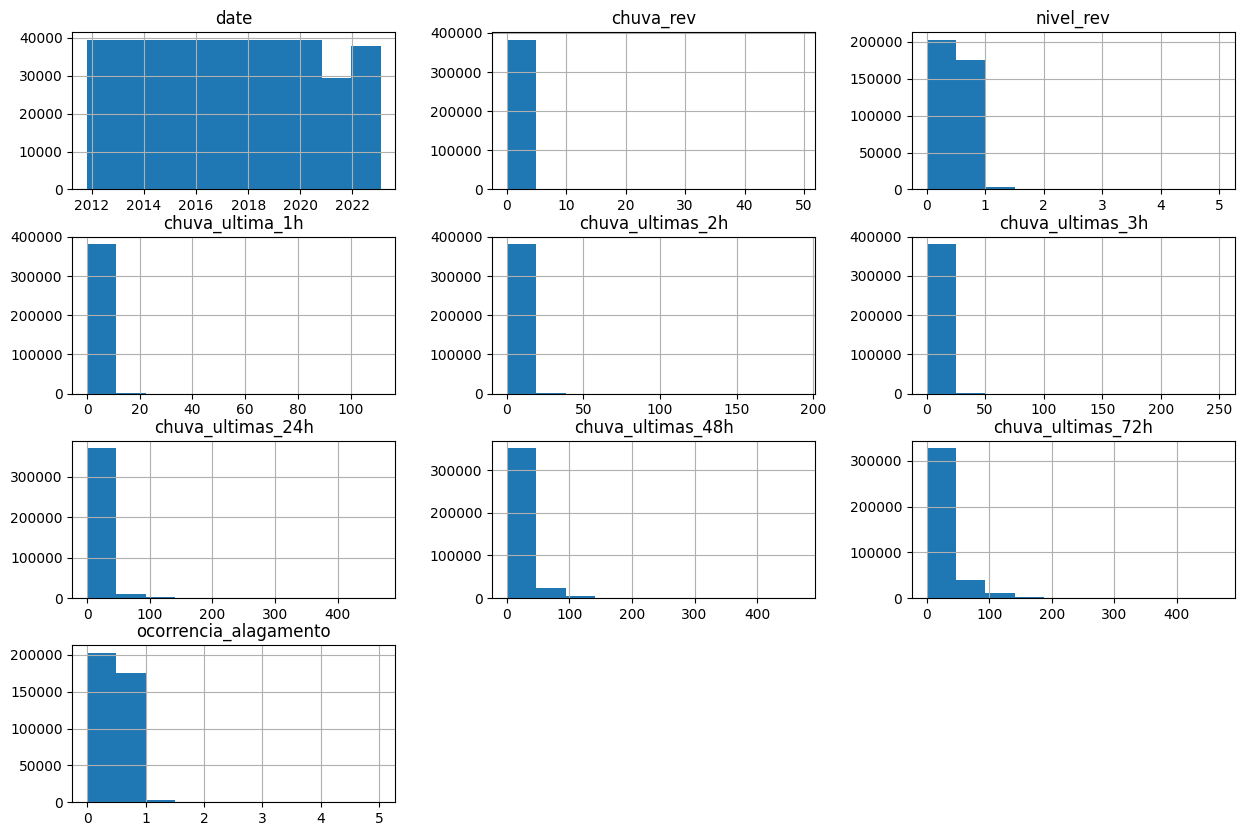

In [33]:
# Histograma
consolidated_rain.hist(figsize = (15,10))
plt.show()

####4.6.2 Boxplot

Por meio dos boxplots pode-se ter uma ideia da dispersão dos dados no dataset e os possíveis outliers.

No boxblot, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50), a linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75).

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

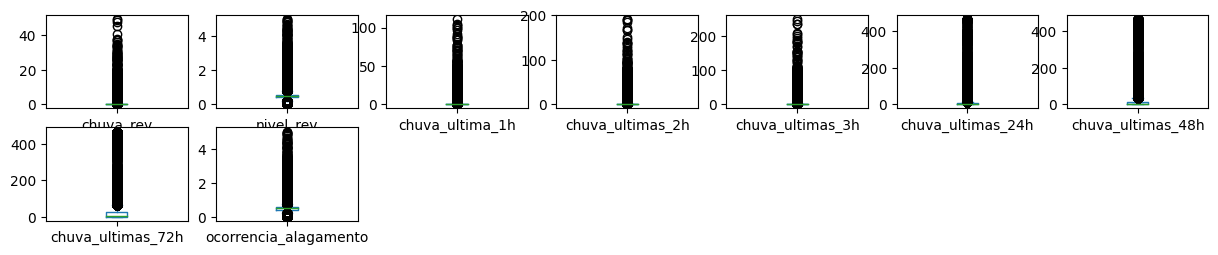

In [34]:
# Boxplot
consolidated_rain.plot(kind = 'box', subplots = True, layout = (7,7), sharex = False,
          sharey = False, figsize = (15,10))
plt.show()

### 4.7. Visualizações Multimodais

A covariância representa como duas variáveis numéricas estão relacionadas em um dataset.

####4.7.1 Correlação de Pearson
Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis, ou seja, à medida que uma variável aumenta, a outra diminui linearmente.
Próximo de +1: há uma correlação positiva entre as variáveis, ou seja, à medida que uma variável aumenta, a outra também aumenta linearmente.
0: não há correlação linear entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados.

O coeficiente de correlação de Pearson é sensível apenas à relações lineares. Se a relação entre as variáveis não é linear, o coeficiente de correlação de Pearson pode não capturar completamente a força da relação.

É importante notar que a correlação não implica causalidade. Dois eventos podem estar correlacionados, mas isso não significa que um cause o outro.

A seguir é apresentada a correlação de Pearson para as variáveis numéricas do dataset estudado.

In [35]:
# Correlação de Pearson
consolidated_rain.corr(method = 'pearson')

,date,chuva_rev,nivel_rev,chuva_ultima_1h,chuva_ultimas_2h,chuva_ultimas_3h,chuva_ultimas_24h,chuva_ultimas_48h,chuva_ultimas_72h,ocorrencia_alagamento
date,1.000000,0.001270,0.256536,0.001732,0.002056,0.002292,0.004253,0.005346,0.006283,0.256536
chuva_rev,0.001270,1.000000,0.300867,0.694330,0.548453,0.469777,0.216475,0.154554,0.119042,0.300867
nivel_rev,0.256536,0.300867,1.000000,0.471596,0.499554,0.488628,0.373279,0.340235,0.329106,1.000000
chuva_ultima_1h,0.001732,0.694330,0.471596,1.000000,0.843222,0.728621,0.320382,0.228401,0.175899,0.471596
chuva_ultimas_2h,0.002056,0.548453,0.499554,0.843222,1.000000,0.913815,0.402929,0.287539,0.221336,0.499554
chuva_ultimas_3h,0.002292,0.469777,0.488628,0.728621,0.913815,1.000000,0.466396,0.333327,0.256470,0.488628
chuva_ultimas_24h,0.004253,0.216475,0.373279,0.320382,0.402929,0.466396,1.000000,0.796636,0.621779,0.373279
chuva_ultimas_48h,0.005346,0.154554,0.340235,0.228401,0.287539,0.333327,0.796636,1.000000,0.842156,0.340235
chuva_ultimas_72h,0.006283,0.119042,0.329106,0.175899,0.221336,0.256470,0.621779,0.842156,1.000000,0.329106
ocorrencia_alagamento,0.256536,0.300867,1.000000,0.471596,0.499554,0.488628,0.373279,0.340235,0.329106,1.000000


####4.7.2. Matriz de Correlação

A seguir é apresentada a matriz de correlação entre os atributos numéricos do dataset.

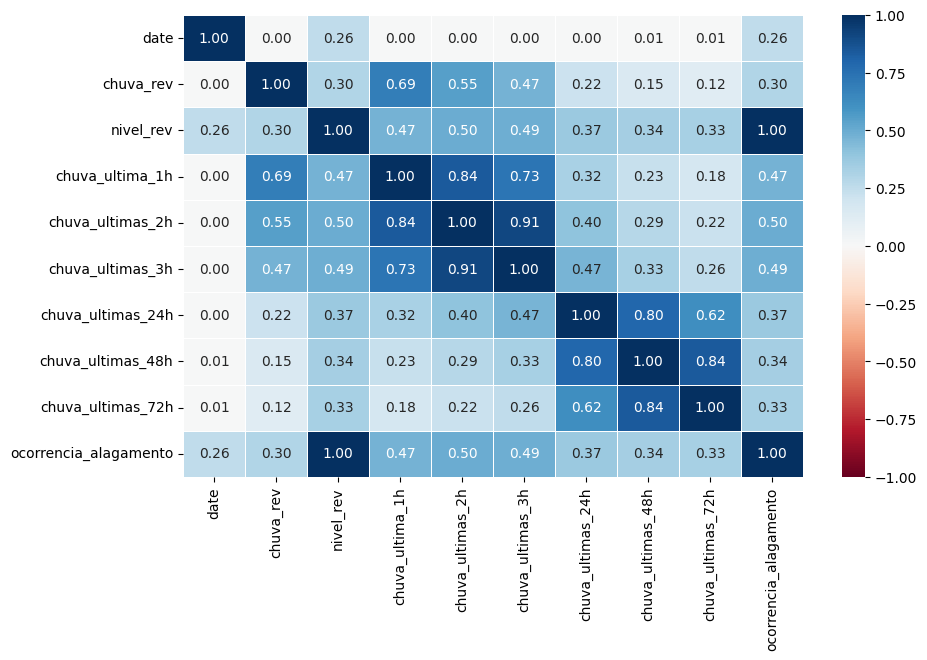

In [36]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(consolidated_rain.corr(), annot=True, fmt = ".2f", cmap='RdBu', linewidths=.5,
            vmin=-1, vmax=1);

####4.7.3. Scatter Plot
O gráfico de dispersão (scatter plot) mostra como duas variáveis numéricas do dataset se relacionam.

De forma a se diminuir o tempo de processamento e facilitar a visualização dos gráficos gerados, optou-se por definir para apresentação apenas os atributos "chuva_ultimas_3h" versus "ocorrencia_alagamento".


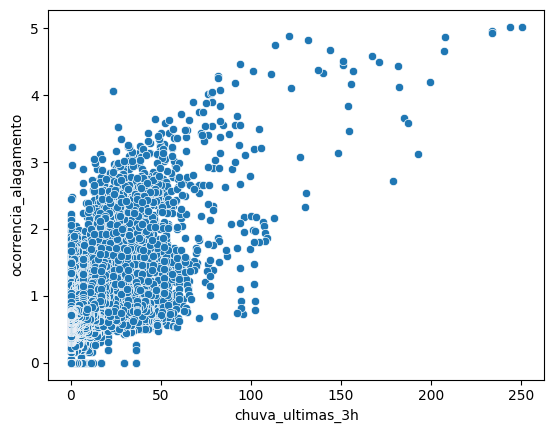

In [37]:
# Plotar gráfico de dispersão com Seaborn
sns.scatterplot(data=consolidated_rain, x="chuva_ultimas_3h", y="ocorrencia_alagamento")
plt.show()


Removendo linhas com valores Nan para exibir linha de tendência e fator R2.

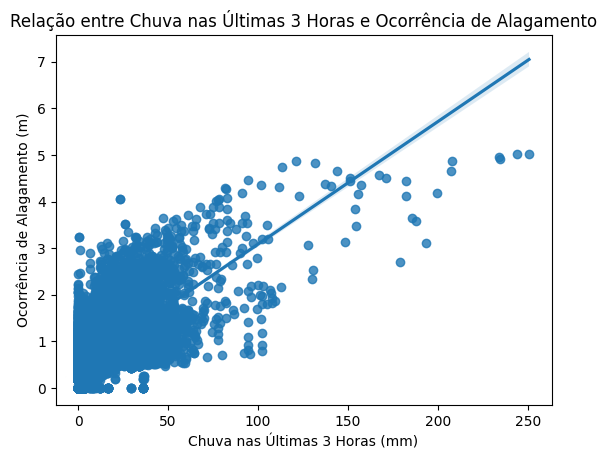

In [38]:
# remover linhas com valores Nan para exibir equacao de linha de tendencia com R2
consolidated_rain_sem_missings = consolidated_rain.dropna()

# Create a regression plot with Seaborn
sns.regplot(x="chuva_ultimas_3h", y="ocorrencia_alagamento", data=consolidated_rain_sem_missings)

# Add title and labels
plt.title("Relação entre Chuva nas Últimas 3 Horas e Ocorrência de Alagamento")
plt.xlabel("Chuva nas Últimas 3 Horas (mm)")
plt.ylabel("Ocorrência de Alagamento (m)")

# Show the plot
plt.show()

Exibir equação da linha de tendencia com R2.

In [39]:
# exibir equacao da linha de tendencia com R2
import statsmodels.api as sm

# Add a constant term to the model
X = consolidated_rain_sem_missings[['chuva_ultimas_3h']]
y = consolidated_rain_sem_missings['ocorrencia_alagamento']
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the equation of the line with R2
print(f"Equation: y = {model.params[1]:.3f}x + {model.params[0]:.3f}")
print(f"R2: {model.rsquared:.3f}")


Equation: y = 0.026x + 0.454
R2: 0.239


####4.7.4. Scatter Plot com comparação de classe

De forma semelhante à realizada anteriormente, optou-se por apresentar apenas alguns atributos para relação com o atributo classe de nosso dataset, "ocorrência_alagamento".

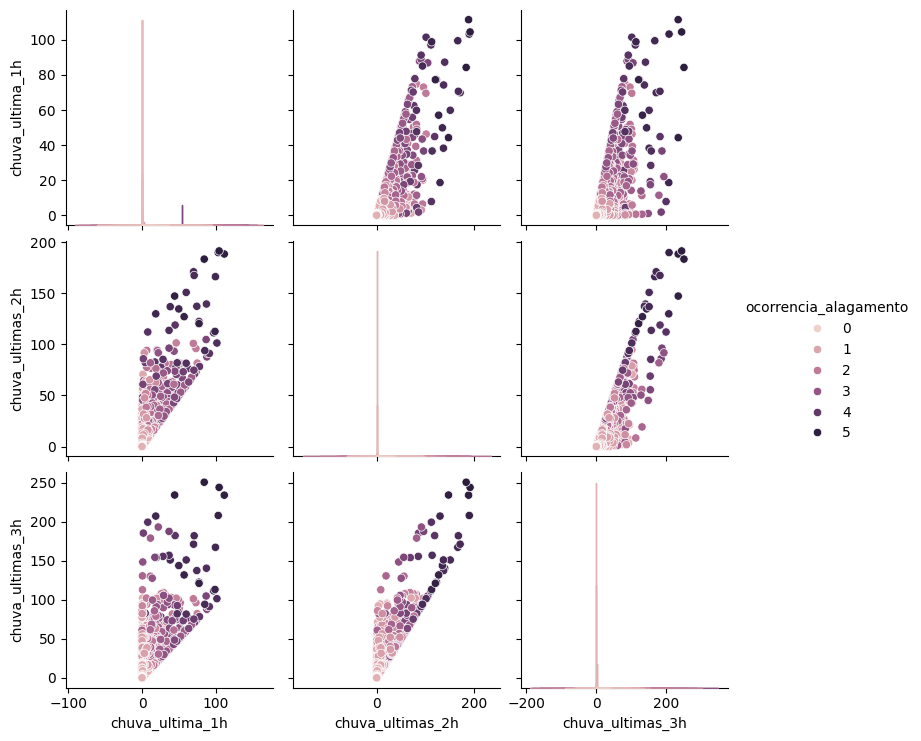

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(consolidated_rain[['chuva_ultima_1h','chuva_ultimas_2h','chuva_ultimas_3h',
                   'ocorrencia_alagamento']], hue = "ocorrencia_alagamento",
             height = 2.5)

##5. Preparação de Dados para Modelo de Aprendizagem de Máquina


###5.1 Definição de atributos e classes
É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), que corresponde a uma amostra dos dados que não será usada para a construção do modelo. Na etapa de construção de um modelo de aprendizagem de máquina, esse conjunto de teste será utilizado no final, para confirmar a precisão do modelo construído. É um teste que pode ser utilizado para verificar o quão boa foi a construção do modelo, e para dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos.

Dessa forma, usaremos 80% do conjunto de dados para modelagem (chamado conjunto de treino) e guardaremos 20% para teste, usando a estratégia "train-test-split".

Primeiramente, iremos sinalizar quais são as colunas de atributos (X) e qual é a coluna das classes (Y).

In [37]:
# Selecionar as colunas de interesse
features = ['chuva_ultima_1h',	'chuva_ultimas_2h',	'chuva_ultimas_3h',
                   'chuva_ultimas_24h',	'chuva_ultimas_48h', 'chuva_ultimas_72h']
target = 'ocorrencia_alagamento'

# Separar features e target
X = consolidated_rain[features]
y = consolidated_rain[target]

# Verificar valores ausentes e substituí-los se necessário
X = X.dropna()
y = y[X.index] # Use the index from X to select corresponding rows in y

###5.2. Separação em conjunto de treino e conjunto de teste

 Em seguida, especificaremos o tamanho do conjunto de teste desejado (30%) e uma semente (para garantir a reprodutibilidade dos resultados).

Por fim, faremos a separação dos conjuntos de treino e teste através do comando "train_test_split", que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

Ressalta-se que essa separação em conjunto de treino e teste, deve ser realizada anteriormente à normalização e padronização dos dados, de forma a evitar o vazamento de dados (data leakage). Ou seja, de forma a se evitar que algum conhecimento sobre o conjunto de teste vaze para o conjunto de dados usado para treinar o modelo, podendo resultar em uma estimativa incorreta do desempenho do modelo ao fazer predições sobre novos dados.

In [38]:
# tamanho do conjunto de teste
test_size = 0.30
seed = 7 # semente aleatória

# fazendo a divisão em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # faz a divisão # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'

# Criando os folds para a validação cruzada
# número de folds da validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [39]:
# Certificar que y_train e y_test são numéricos
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

Especifica o nível correspondente ao extravasamento: 3.2 m.

In [40]:
# Converter o target real em classificações binárias
threshold = 3.2
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

###5.3. Modelagem e Inferência


Objetivo: treinar e avaliar os modelos com melhor desempenho.
Iniciamos a etapa de modelagem e inferência, porém não sabemos previamente quais algoritmos performarão bem nesse conjunto de dados. Assim, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica "acurácia".
Primeiramente, iremos avaliar os algoritmos com a configuração padrão de hiperparâmetros da scikit-Learn.
Criamos os ensembles e adicionamos na lista de modelos

####5.3.1 - Criação e avaliação de modelos: linha base

LR: 0.999877 (0.000047)
KNN: 0.999843 (0.000074)
CART: 0.999832 (0.000080)


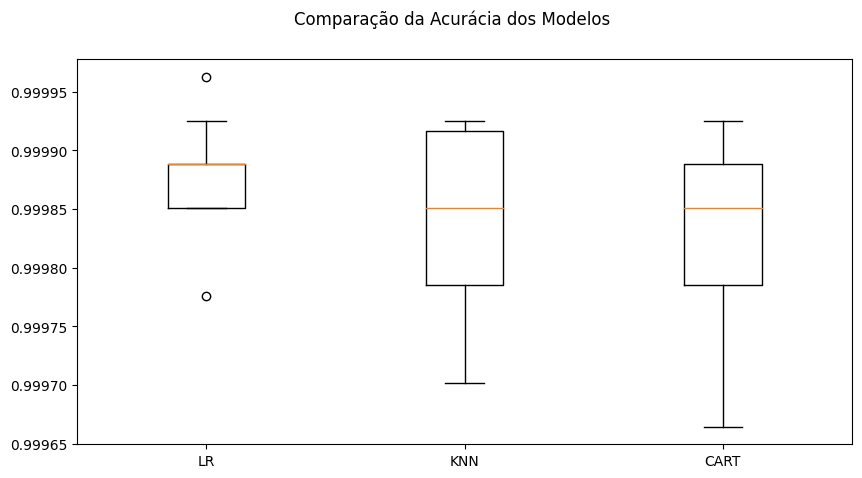

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Modelagem
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
#model3 = SVC()
#bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
#models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
#models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
#models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
#models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train_binary, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Etapa de modelagem e inferência, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original.

####5.3.2 - Criação e avaliação de modelos: dados padronizados e normalizados


LR-orig: 1.000 (0.000)
KNN-orig: 1.000 (0.000)
CART-orig: 1.000 (0.000)
LR-padr: 1.000 (0.000)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
LR-norm: 1.000 (0.000)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)


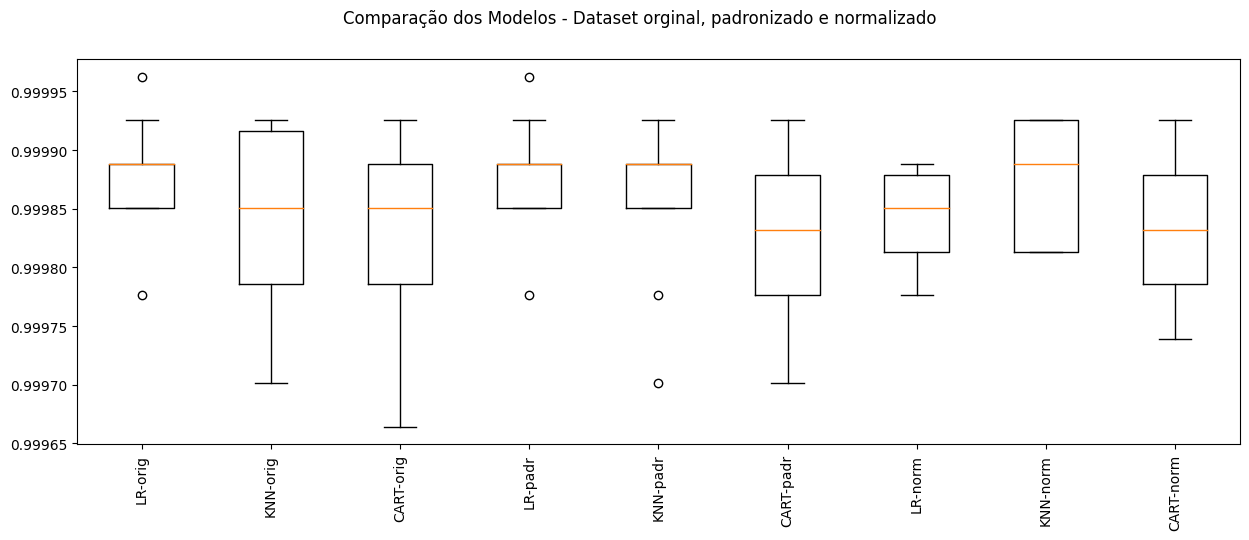

In [45]:
np.random.seed(7) # definindo uma semente global

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
#naive_bayes = ('NB', GaussianNB())
#svm = ('SVM', SVC())
#bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
#random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
#extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
#adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
#gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
#voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
#pipelines.append(('NB-orig', Pipeline([naive_bayes])))
#pipelines.append(('SVM-orig', Pipeline([svm])))
#pipelines.append(('Bag-orig', Pipeline([bagging])))
#pipelines.append(('RF-orig', Pipeline([random_forest])))
#pipelines.append(('ET-orig', Pipeline([extra_trees])))
#pipelines.append(('Ada-orig', Pipeline([adaboost])))
#pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
#pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
#pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
#pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
#pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
#pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
#pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
#pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
#pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
#pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
#pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
#pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
#pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
#pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
#pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
#pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
#pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
#pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train_binary, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

###5.4. Finalização do Modelo e Avaliação de Resultados

Objetivo: Analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)
Considerou-se os dois modelos que alcançaram os melhores resultados e, portanto, foram os escolhidos para implementação: *árvore de decisão e regressão logística.
Em seguida, o modelo é finalizado, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada), e são feitas predições para o conjunto de dados de teste que foi separado no início, a fim de confirmar os resultados.
Primeiro, será realizada a padronização dos dados de entrada, em seguida o modelo será treinado e a acurácia de teste será exibida.

In [46]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model_LR = LogisticRegression(max_iter=200)
model = DecisionTreeClassifier()
model_LR.fit(rescaledX, y_train_binary)
model.fit(rescaledX, y_train_binary)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions_LR = model_LR.predict(rescaledTestX)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test_binary, predictions_LR))
print(accuracy_score(y_test_binary, predictions))

0.9997998834103348
0.9998259855742041


###6. Simulando a Aplicação do Modelo em Dados Não Vistos

Por fim, é realizada a simulação da aplicação do modelo em dados não vistos, considerando três novas instâncias, com classe de saída desconhecidas.
Aplica-se, então, o modelo recém-treinado para fazer a predição das classes. Para tal, será necessário antes padronizar os dados utilizando a mesma escala dos dados usados no treinamento do modelo.

In [51]:
# Novos dados - não sabemos a classe!
data = {'chuva_ultima_1h': [37.9, 15.0, 5.5],
        'chuva_ultimas_2h': [45.0, 17.0, 10.0],
        'chuva_ultimas_3h': [80.0, 35.0, 8.0],
        'chuva_ultimas_24h': [106.2, 78.0, 13.0],
        'chuva_ultimas_48h': [254.5, 55.0, 6.0],
        'chuva_ultimas_72h': [375.0, 47.9, 1.9]}

atributos = ['chuva_ultima_1h',	'chuva_ultimas_2h',	'chuva_ultimas_3h',
                   'chuva_ultimas_24h',	'chuva_ultimas_48h', 'chuva_ultimas_72h']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[20.42959143 14.31024056 18.93985309  5.51416756  8.91646322 10.02665479]
 [ 7.99391643  5.29413373  8.17338292  3.95127396  1.55944755  0.78510084]
 [ 2.83501195  3.04010702  1.71350081  0.34885963 -0.24753875 -0.51453683]]


Realiza-se a predição das classes para os novos dados.

In [52]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)  #modelo árvore de decisão
print(saidas)

[0 0 0]


In [50]:
# Predição de classes dos dados de entrada
saidas = model_LR.predict(rescaledEntradaX)  #modelo regressão logistica
print(saidas)

[0 0 0]


Observa-se que, para as três novas instâncias, foram obtidos resultados de "ocorrencia_alagamento", sendo "0" valores abaixo de 3.2 m e "1" valores acima de 3.1 m.


In [48]:
# prompt: como imprimir o notebook em pdf

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab_Notebooks/MVP_pos_doc_ocorr_alagamento.ipynb


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/MVP_pos_doc_ocorr_alagamento.ipynb to pdf
[NbConvertApp] Support files will be in MVP_pos_doc_ocorr_alagamento_files/
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making directory ./MVP_pos_doc_ocorr_alagamento_files
[NbConvertApp] Making di